In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# load library

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# read data

In [3]:
df = pd.read_parquet("/content/drive/MyDrive/Final/data/all_append_csv_12_25_2325i.gzip")
df

,제목,가사,장르
0,무지개 (Rainbow) (Feat. 조용휘),동그랗고 하얀 이마\n오똑한 반짝이는 코\n다갈색 눈동자 옆 살짝 보이는 점까지\n...,뮤지컬
1,나 주는 줄 알고 손 내밀었잖아,넌 밉고 난 쪽팔린다\n뭘 이런 걸 다 사 왔어 할지\n헉 뭐야 고마워 할지\n아이...,뮤지컬
2,너와나,이 땅위에 태어나 비로소 여기 있네\n우리 모두가 그리던 그 날\n바라고 바라던 꿈...,뮤지컬
3,나만의 언어 rep.,"(좋아)\n나는 널 이렇게 부를게\n(자유, 그래 자유)\n난 너를 이렇게 부를래\...",뮤지컬
4,여기는 엄마 컴퍼니,어떤 엄마를 원하십니까\n원하는 엄마를 고를 수 있는\n여기는 바로 바로 엄마컴퍼니...,뮤지컬
...,...,...,...
99823,Stargirl (2013 Ver.),처음엔 미처 몰랐어\n눈부신 사랑에 빠질 줄은\n멀리서 전학 온 이상한 아이가\n너...,록메탈
99824,사랑 아니었나,Du Du Du Du Du Du Du Du Du Du\nDu Du Du Du Du ...,록메탈
99825,아는 번호,오늘은 좀 어떠니\n여전히 또 울고 있니 넌\n듣게 될 줄 몰랐어\n그렇게 우는 널...,록메탈
99826,Try To Remember You,Try to remember you 네꿈 꾸고\n싶어서 난 자꾸 나가 오\n피곤해야...,록메탈


In [4]:
df["가사"]

0        동그랗고 하얀 이마\n오똑한 반짝이는 코\n다갈색 눈동자 옆 살짝 보이는 점까지\n...
1        넌 밉고 난 쪽팔린다\n뭘 이런 걸 다 사 왔어 할지\n헉 뭐야 고마워 할지\n아이...
2        이 땅위에 태어나 비로소 여기 있네\n우리 모두가 그리던 그 날\n바라고 바라던 꿈...
3        (좋아)\n나는 널 이렇게 부를게\n(자유, 그래 자유)\n난 너를 이렇게 부를래\...
4        어떤 엄마를 원하십니까\n원하는 엄마를 고를 수 있는\n여기는 바로 바로 엄마컴퍼니...
                               ...                        
99823    처음엔 미처 몰랐어\n눈부신 사랑에 빠질 줄은\n멀리서 전학 온 이상한 아이가\n너...
99824    Du Du Du Du Du Du Du Du Du Du\nDu Du Du Du Du ...
99825    오늘은 좀 어떠니\n여전히 또 울고 있니 넌\n듣게 될 줄 몰랐어\n그렇게 우는 널...
99826    Try to remember you 네꿈 꾸고\n싶어서 난 자꾸 나가 오\n피곤해야...
99827    이별이란 생각으로 울지마\n그건 너의 작은 착각일뿐야\n가면 어딜가니\n좁은 이 하...
Name: 가사, Length: 99828, dtype: object

# 전처리

## 정규 표현식

In [5]:
# 알파벳 모두 소문자
df["가사"] = df["가사"].str.lower()

In [6]:
df["가사"] = df["가사"].map(lambda x: re.sub("\n+", " ", x))

In [7]:
# 한글과 영어, 공백만 남기고 제거
df["가사"] = df["가사"].map(lambda x: re.sub("[^ㄱ-ㅎㅏ-ㅣ가-힣 a-zA-Z]", "", x))

In [8]:
# 여러 개의 공백을 하나로
df["가사"].map(lambda x: re.sub("[\s]+", " ", x))

0        동그랗고 하얀 이마 오똑한 반짝이는 코 다갈색 눈동자 옆 살짝 보이는 점까지 나완 ...
1        넌 밉고 난 쪽팔린다 뭘 이런 걸 다 사 왔어 할지 헉 뭐야 고마워 할지 아이 됐어...
2        이 땅위에 태어나 비로소 여기 있네 우리 모두가 그리던 그 날 바라고 바라던 꿈들이...
3        좋아 나는 널 이렇게 부를게 자유 그래 자유 난 너를 이렇게 부를래 생명 아니면 죽...
4        어떤 엄마를 원하십니까 원하는 엄마를 고를 수 있는 여기는 바로 바로 엄마컴퍼니 엄...
                               ...                        
99823    처음엔 미처 몰랐어 눈부신 사랑에 빠질 줄은 멀리서 전학 온 이상한 아이가 너란 걸...
99824    du du du du du du du du du du du du du du du d...
99825    오늘은 좀 어떠니 여전히 또 울고 있니 넌 듣게 될 줄 몰랐어 그렇게 우는 널 아무...
99826    try to remember you 네꿈 꾸고 싶어서 난 자꾸 나가 오 피곤해야해 ...
99827    이별이란 생각으로 울지마 그건 너의 작은 착각일뿐야 가면 어딜가니 좁은 이 하늘아래...
Name: 가사, Length: 99828, dtype: object

In [9]:
df["가사"]

0        동그랗고 하얀 이마 오똑한 반짝이는 코 다갈색 눈동자 옆 살짝 보이는 점까지 나완 ...
1        넌 밉고 난 쪽팔린다 뭘 이런 걸 다 사 왔어 할지 헉 뭐야 고마워 할지 아이 됐어...
2        이 땅위에 태어나 비로소 여기 있네 우리 모두가 그리던 그 날 바라고 바라던 꿈들이...
3        좋아 나는 널 이렇게 부를게 자유 그래 자유 난 너를 이렇게 부를래 생명 아니면 죽...
4        어떤 엄마를 원하십니까 원하는 엄마를 고를 수 있는 여기는 바로 바로 엄마컴퍼니 엄...
                               ...                        
99823    처음엔 미처 몰랐어 눈부신 사랑에 빠질 줄은 멀리서 전학 온 이상한 아이가 너란 걸...
99824    du du du du du du du du du du du du du du du d...
99825    오늘은 좀 어떠니 여전히 또 울고 있니 넌 듣게 될 줄 몰랐어 그렇게 우는 널 아무...
99826    try to remember you 네꿈 꾸고 싶어서 난 자꾸 나가 오 피곤해야해 ...
99827    이별이란 생각으로 울지마 그건 너의 작은 착각일뿐야 가면 어딜가니 좁은 이 하늘아래...
Name: 가사, Length: 99828, dtype: object

## 불용어 처리
[불용어 출처](https://mr-doosun.tistory.com/24)

In [10]:
# 불용어 정의
stop_words = "간주 아 휴 아이구 아이쿠 아이고 어 나 우리 저희 따라 의해 을 를 에 의 가 으로 로 에게 뿐이다 의거하여 근거하여 입각하여 기준으로 예하면 예를 들면 예를 들자면 저 소인 소생 저희 지말고 하지마 하지마라 다른 물론 또한 그리고 비길수 없다 해서는 안된다 뿐만 아니라 만이 아니다 만은 아니다 막론하고 관계없이 그치지 않다 그러나 그런데 하지만 든간에 논하지 않다 따지지 않다 설사 비록 더라도 아니면 만 못하다 하는 편이 낫다 불문하고 향하여 향해서 향하다 쪽으로 틈타 이용하여 타다 오르다 제외하고 이 외에 이 밖에 하여야 비로소 한다면 몰라도 외에도 이곳 여기 부터 기점으로 따라서 할 생각이다 하려고하다 이리하여 그리하여 그렇게 함으로써 하지만 일때 할때 앞에서 중에서 보는데서 으로써 로써 까지 해야한다 일것이다 반드시 할줄알다 할수있다 할수있어 임에 틀림없다 한다면 등 등등 제 겨우 단지 다만 할뿐 딩동 댕그 대해서 대하여 대하면 훨씬 얼마나 얼마만큼 얼마큼 남짓 여 얼마간 약간 다소 좀 조금 다수 몇 얼마 지만 하물며 또한 그러나 그렇지만 하지만 이외에도 대해 말하자면 뿐이다 다음에 반대로 반대로 말하자면 이와 반대로 바꾸어서 말하면 바꾸어서 한다면 만약 그렇지않으면 까악 툭 딱 삐걱거리다 보드득 비걱거리다 꽈당 응당 해야한다 에 가서 각 각각 여러분 각종 각자 제각기 하도록하다 와 과 그러므로 그래서 고로 한 까닭에 하기 때문에 거니와 이지만 대하여 관하여 관한 과연 실로 아니나다를가 생각한대로 진짜로 한적이있다 하곤하였다 하 하하 허허 아하 거바 와 오 왜 어째서 무엇때문에 어찌 하겠는가 무슨 어디 어느곳 더군다나 하물며 더욱이는 어느때 언제 야 이봐 어이 여보시오 흐흐 흥 휴 헉헉 헐떡헐떡 영차 여차 어기여차 끙끙 아야 앗 아야 콸콸 졸졸 좍좍 뚝뚝 주룩주룩 솨 우르르 그래도 또 그리고 바꾸어말하면 바꾸어말하자면 혹은 혹시 답다 및 그에 따르는 때가 되어 즉 지든지 설령 가령 하더라도 할지라도 일지라도 지든지 몇 거의 하마터면 인젠 이젠 된바에야 된이상 만큼 어찌됏든 그위에 게다가 점에서 보아 비추어 보아 고려하면 하게될것이다 일것이다 비교적 좀 보다더 비하면 시키다 하게하다 할만하다 의해서 연이서 이어서 잇따라 뒤따라 뒤이어 결국 의지하여 기대여 통하여 자마자 더욱더 불구하고 얼마든지 마음대로 주저하지 않고 곧 즉시 바로 당장 하자마자 밖에 안된다 하면된다 그래 그렇지 요컨대 다시 말하자면 바꿔 말하면 즉 구체적으로 말하자면 시작하여 시초에 이상 허 헉 허걱 바와같이 해도좋다 해도된다 게다가 더구나 하물며 와르르 팍 퍽 펄렁 동안 이래 하고있었다 이었다 에서 로부터 까지 예하면 했어요 해요 함께 같이 더불어 마저 마저도 양자 모두 습니다 가까스로 하려고하다 즈음하여 다른 다른 방면으로 해봐요 습니까 했어요 말할것도 없고 무릎쓰고 개의치않고 하는것만 못하다 하는것이 낫다 매 매번 들 모 어느것 어느 로써 갖고말하자면 어디 어느쪽 어느것 어느해 어느 년도 라 해도 언젠가 어떤것 어느것 저기 저쪽 저것 그때 그럼 그러면 요만한걸 그래 그때 저것만큼 그저 이르기까지 할 줄 안다 할 힘이 있다 너 너희 당신 어찌 설마 차라리 할지언정 할지라도 할망정 할지언정 구토하다 게우다 토하다 메쓰겁다 옆사람 퉤 쳇 의거하여 근거하여 의해 따라 힘입어 그 다음 버금 두번째로 기타 첫번째로 나머지는 그중에서 견지에서 형식으로 쓰여 입장에서 위해서 단지 의해되다 하도록시키다 뿐만아니라 반대로 전후 전자 앞의것 잠시 잠깐 하면서 그렇지만 다음에 그러한즉 그런즉 남들 아무거나 어찌하든지 같다 비슷하다 예컨대 이럴정도로 어떻게 만약 만일 위에서 서술한바와같이 인 듯하다 하지 않는다면 만약에 무엇 무슨 어느 어떤 아래윗 조차 한데 그럼에도 불구하고 여전히 심지어 까지도 조차도 하지 않도록 않기 위하여 때 시각 무렵 시간 동안 어때 어떠한 하여금 네 예 우선 누구 누가 알겠는가 아무도 줄은모른다 줄은 몰랏다 하는 김에 겸사겸사 하는바 그런 까닭에 한 이유는 그러니 그러니까 때문에 그 너희 그들 너희들 타인 것 것들 너 위하여 공동으로 동시에 하기 위하여 어찌하여 무엇때문에 붕붕 윙윙 나 우리 엉엉 휘익 윙윙 오호 아하 어쨋든 만 못하다 하기보다는 차라리 하는 편이 낫다 흐흐 놀라다 상대적으로 말하자면 마치 아니라면 쉿 그렇지 않으면 그렇지 않다면 안 그러면 아니었다면 하든지 아니면 이라면 좋아 알았어 하는것도 그만이다 어쩔수 없다 하나 일 일반적으로 일단 한켠으로는 오자마자 이렇게되면 이와같다면 전부 한마디 한항목 근거로 하기에 아울러 하지 않도록 않기 위해서 이르기까지 이 되다 로 인하여 까닭으로 이유만으로 이로 인하여 그래서 이 때문에 그러므로 그런 까닭에 알 수 있다 결론을 낼 수 있다 으로 인하여 있다 어떤것 관계가 있다 관련이 있다 연관되다 어떤것들 에 대해 이리하여 그리하여 여부 하기보다는 하느니 하면 할수록 운운 이러이러하다 하구나 하도다 다시말하면 다음으로 에 있다 에 달려 있다 우리 우리들 오히려 하기는한데 어떻게 어떻해 어찌됏어 어때 어째서 본대로 자 이 이쪽 여기 이것 이번 이렇게말하자면 이런 이러한 이와 같은 요만큼 요만한 것 얼마 안 되는 것 이만큼 이 정도의 이렇게 많은 것 이와 같다 이때 이렇구나 것과 같이 끼익 삐걱 따위 와 같은 사람들 부류의 사람들 왜냐하면 중의하나 오직 오로지 에 한하다 하기만 하면 도착하다 까지 미치다 도달하다 정도에 이르다 할 지경이다 결과에 이르다 관해서는 여러분 하고 있다 한 후 혼자 자기 자기집 자신 우에 종합한것과같이 총적으로 보면 총적으로 말하면 총적으로 대로 하다 으로서 참 그만이다 할 따름이다 쿵 탕탕 쾅쾅 둥둥 봐 봐라 아이야 아니 와아 응 아이 참나 년 월 일 령 영 일 이 삼 사 오 육 륙 칠 팔 구 이천육 이천칠 이천팔 이천구 하나 둘 셋 넷 다섯 여섯 일곱 여덟 아홉 령 영 이 있 하 것 들 그 되 수 이 보 않 없 나 사람 주 아니 등 같 우리 때 년 가 한 지 대하 오 말 일 그렇 위하 때문 그것 두 말하 알 그러나 받 못하 일 그런 또 문제 더 사회 많 그리고 좋 크 따르 중 나오 가지 씨 시키 만들 지금 생각하 그러 속 하나 집 살 모르 적 월 데 자신 안 어떤 내 내 경우 명 생각 시간 그녀 다시 이런 앞 보이 번 나 다른 어떻 여자 개 전 들 사실 이렇 점 싶 말 정도 좀 원 잘 통하 놓 "

In [11]:
# 불용어 정의 리스트화
stop_words = stop_words.split()
print("불용어 개수 :", len(stop_words))
stop_words[:5]

불용어 개수 : 889


['간주', '아', '휴', '아이구', '아이쿠']

In [12]:
# 불용어 제거 함수
def remove_stopwords(text):
    tokens = text.split(' ')
    stops = stop_words
    meaningful_words = [w for w in tokens if not w in stops]
    return ' '.join(meaningful_words)

# 함수 버전

## stop words

In [14]:
# 불용어 선언
stop_words = "간주 아 휴 아이구 아이쿠 아이고 어 나 우리 저희 따라 의해 을 를 에 의 가 으로 로 에게 뿐이다 의거하여 근거하여 입각하여 기준으로 예하면 예를 들면 예를 들자면 저 소인 소생 저희 지말고 하지마 하지마라 다른 물론 또한 그리고 비길수 없다 해서는 안된다 뿐만 아니라 만이 아니다 만은 아니다 막론하고 관계없이 그치지 않다 그러나 그런데 하지만 든간에 논하지 않다 따지지 않다 설사 비록 더라도 아니면 만 못하다 하는 편이 낫다 불문하고 향하여 향해서 향하다 쪽으로 틈타 이용하여 타다 오르다 제외하고 이 외에 이 밖에 하여야 비로소 한다면 몰라도 외에도 이곳 여기 부터 기점으로 따라서 할 생각이다 하려고하다 이리하여 그리하여 그렇게 함으로써 하지만 일때 할때 앞에서 중에서 보는데서 으로써 로써 까지 해야한다 일것이다 반드시 할줄알다 할수있다 할수있어 임에 틀림없다 한다면 등 등등 제 겨우 단지 다만 할뿐 딩동 댕그 대해서 대하여 대하면 훨씬 얼마나 얼마만큼 얼마큼 남짓 여 얼마간 약간 다소 좀 조금 다수 몇 얼마 지만 하물며 또한 그러나 그렇지만 하지만 이외에도 대해 말하자면 뿐이다 다음에 반대로 반대로 말하자면 이와 반대로 바꾸어서 말하면 바꾸어서 한다면 만약 그렇지않으면 까악 툭 딱 삐걱거리다 보드득 비걱거리다 꽈당 응당 해야한다 에 가서 각 각각 여러분 각종 각자 제각기 하도록하다 와 과 그러므로 그래서 고로 한 까닭에 하기 때문에 거니와 이지만 대하여 관하여 관한 과연 실로 아니나다를가 생각한대로 진짜로 한적이있다 하곤하였다 하 하하 허허 아하 거바 와 오 왜 어째서 무엇때문에 어찌 하겠는가 무슨 어디 어느곳 더군다나 하물며 더욱이는 어느때 언제 야 이봐 어이 여보시오 흐흐 흥 휴 헉헉 헐떡헐떡 영차 여차 어기여차 끙끙 아야 앗 아야 콸콸 졸졸 좍좍 뚝뚝 주룩주룩 솨 우르르 그래도 또 그리고 바꾸어말하면 바꾸어말하자면 혹은 혹시 답다 및 그에 따르는 때가 되어 즉 지든지 설령 가령 하더라도 할지라도 일지라도 지든지 몇 거의 하마터면 인젠 이젠 된바에야 된이상 만큼 어찌됏든 그위에 게다가 점에서 보아 비추어 보아 고려하면 하게될것이다 일것이다 비교적 좀 보다더 비하면 시키다 하게하다 할만하다 의해서 연이서 이어서 잇따라 뒤따라 뒤이어 결국 의지하여 기대여 통하여 자마자 더욱더 불구하고 얼마든지 마음대로 주저하지 않고 곧 즉시 바로 당장 하자마자 밖에 안된다 하면된다 그래 그렇지 요컨대 다시 말하자면 바꿔 말하면 즉 구체적으로 말하자면 시작하여 시초에 이상 허 헉 허걱 바와같이 해도좋다 해도된다 게다가 더구나 하물며 와르르 팍 퍽 펄렁 동안 이래 하고있었다 이었다 에서 로부터 까지 예하면 했어요 해요 함께 같이 더불어 마저 마저도 양자 모두 습니다 가까스로 하려고하다 즈음하여 다른 다른 방면으로 해봐요 습니까 했어요 말할것도 없고 무릎쓰고 개의치않고 하는것만 못하다 하는것이 낫다 매 매번 들 모 어느것 어느 로써 갖고말하자면 어디 어느쪽 어느것 어느해 어느 년도 라 해도 언젠가 어떤것 어느것 저기 저쪽 저것 그때 그럼 그러면 요만한걸 그래 그때 저것만큼 그저 이르기까지 할 줄 안다 할 힘이 있다 너 너희 당신 어찌 설마 차라리 할지언정 할지라도 할망정 할지언정 구토하다 게우다 토하다 메쓰겁다 옆사람 퉤 쳇 의거하여 근거하여 의해 따라 힘입어 그 다음 버금 두번째로 기타 첫번째로 나머지는 그중에서 견지에서 형식으로 쓰여 입장에서 위해서 단지 의해되다 하도록시키다 뿐만아니라 반대로 전후 전자 앞의것 잠시 잠깐 하면서 그렇지만 다음에 그러한즉 그런즉 남들 아무거나 어찌하든지 같다 비슷하다 예컨대 이럴정도로 어떻게 만약 만일 위에서 서술한바와같이 인 듯하다 하지 않는다면 만약에 무엇 무슨 어느 어떤 아래윗 조차 한데 그럼에도 불구하고 여전히 심지어 까지도 조차도 하지 않도록 않기 위하여 때 시각 무렵 시간 동안 어때 어떠한 하여금 네 예 우선 누구 누가 알겠는가 아무도 줄은모른다 줄은 몰랏다 하는 김에 겸사겸사 하는바 그런 까닭에 한 이유는 그러니 그러니까 때문에 그 너희 그들 너희들 타인 것 것들 너 위하여 공동으로 동시에 하기 위하여 어찌하여 무엇때문에 붕붕 윙윙 나 우리 엉엉 휘익 윙윙 오호 아하 어쨋든 만 못하다 하기보다는 차라리 하는 편이 낫다 흐흐 놀라다 상대적으로 말하자면 마치 아니라면 쉿 그렇지 않으면 그렇지 않다면 안 그러면 아니었다면 하든지 아니면 이라면 좋아 알았어 하는것도 그만이다 어쩔수 없다 하나 일 일반적으로 일단 한켠으로는 오자마자 이렇게되면 이와같다면 전부 한마디 한항목 근거로 하기에 아울러 하지 않도록 않기 위해서 이르기까지 이 되다 로 인하여 까닭으로 이유만으로 이로 인하여 그래서 이 때문에 그러므로 그런 까닭에 알 수 있다 결론을 낼 수 있다 으로 인하여 있다 어떤것 관계가 있다 관련이 있다 연관되다 어떤것들 에 대해 이리하여 그리하여 여부 하기보다는 하느니 하면 할수록 운운 이러이러하다 하구나 하도다 다시말하면 다음으로 에 있다 에 달려 있다 우리 우리들 오히려 하기는한데 어떻게 어떻해 어찌됏어 어때 어째서 본대로 자 이 이쪽 여기 이것 이번 이렇게말하자면 이런 이러한 이와 같은 요만큼 요만한 것 얼마 안 되는 것 이만큼 이 정도의 이렇게 많은 것 이와 같다 이때 이렇구나 것과 같이 끼익 삐걱 따위 와 같은 사람들 부류의 사람들 왜냐하면 중의하나 오직 오로지 에 한하다 하기만 하면 도착하다 까지 미치다 도달하다 정도에 이르다 할 지경이다 결과에 이르다 관해서는 여러분 하고 있다 한 후 혼자 자기 자기집 자신 우에 종합한것과같이 총적으로 보면 총적으로 말하면 총적으로 대로 하다 으로서 참 그만이다 할 따름이다 쿵 탕탕 쾅쾅 둥둥 봐 봐라 아이야 아니 와아 응 아이 참나 년 월 일 령 영 일 이 삼 사 오 육 륙 칠 팔 구 이천육 이천칠 이천팔 이천구 하나 둘 셋 넷 다섯 여섯 일곱 여덟 아홉 령 영 이 있 하 것 들 그 되 수 이 보 않 없 나 사람 주 아니 등 같 우리 때 년 가 한 지 대하 오 말 일 그렇 위하 때문 그것 두 말하 알 그러나 받 못하 일 그런 또 문제 더 사회 많 그리고 좋 크 따르 중 나오 가지 씨 시키 만들 지금 생각하 그러 속 하나 집 살 모르 적 월 데 자신 안 어떤 내 내 경우 명 생각 시간 그녀 다시 이런 앞 보이 번 나 다른 어떻 여자 개 전 들 사실 이렇 점 싶 말 정도 좀 원 잘 통하 놓 "
stop_words = stop_words.split()

# 불용어 제거 함수
def remove_stopwords(text):
    tokens = text.split(' ')
    stops = stop_words
    meaningful_words = [w for w in tokens if not w in stops]
    return ' '.join(meaningful_words)

## preprocessing

In [15]:
def preprocessiong_for_word_cloud(data):
    # 알파벳 모두 소문자
    dat = data.lower()

    # 개행문자 공백 처리
    data = re.sub("\n+", " ", data)

    # 한글과 영어, 공백만 남기고 제거
    data = re.sub("[^ㄱ-ㅎㅏ-ㅣ가-힣 a-zA-Z]", "", data)

    # 여러 개의 공백을 하나로
    data = re.sub("[\s]+", " ", data)

    # 불용어 제거
    data = remove_stopwords(data)

    return data

## word cloud

In [16]:
# 장르 종류 : ['뮤지컬', '동요', '발라드', '댄스', '포크블루스', '힙합', '트로트', '록메탈', 'RNB']
# 장르를 입력하면 word cloud 출력
def word_cloud(df, genre, width=1200, height=500):
    # 입력 받은 장르에 맞는 데이터 추출
    condition = df["장르"] == genre
    series_lyrics = df.loc[condition, "가사"]

    # 전처리
    series_lyrics = series_lyrics.map(preprocessiong_for_word_cloud)

    # 가사 문자열로 변환
    data = " ".join(series_lyrics)
    
    # word cloud 그리기
    word_draw = WordCloud(
        font_path='/content/drive/MyDrive/Final/AppleSDGothicNeo.ttc',
        width=width, height=height,
        # stopwords=["합니다", "입니다"], 
        background_color="white",
        random_state=42
    )
    word_draw.generate(data)

    plt.figure(figsize=(15, 7))
    plt.imshow(word_draw)
    plt.axis("off")
    plt.show()   

# konlpy로 토큰화 후 다시...

In [17]:
# !pip3 install konlpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 19.4 MB 1.2 MB/s 
     |████████████████████████████████| 465 kB 64.9 MB/s 


In [18]:
from konlpy.tag import Okt

tokenizer = Okt()

In [19]:
# 불용어 선언
stop_words = "간주 아 휴 아이구 아이쿠 아이고 어 나 우리 저희 따라 의해 을 를 에 의 가 으로 로 에게 뿐이다 의거하여 근거하여 입각하여 기준으로 예하면 예를 들면 예를 들자면 저 소인 소생 저희 지말고 하지마 하지마라 다른 물론 또한 그리고 비길수 없다 해서는 안된다 뿐만 아니라 만이 아니다 만은 아니다 막론하고 관계없이 그치지 않다 그러나 그런데 하지만 든간에 논하지 않다 따지지 않다 설사 비록 더라도 아니면 만 못하다 하는 편이 낫다 불문하고 향하여 향해서 향하다 쪽으로 틈타 이용하여 타다 오르다 제외하고 이 외에 이 밖에 하여야 비로소 한다면 몰라도 외에도 이곳 여기 부터 기점으로 따라서 할 생각이다 하려고하다 이리하여 그리하여 그렇게 함으로써 하지만 일때 할때 앞에서 중에서 보는데서 으로써 로써 까지 해야한다 일것이다 반드시 할줄알다 할수있다 할수있어 임에 틀림없다 한다면 등 등등 제 겨우 단지 다만 할뿐 딩동 댕그 대해서 대하여 대하면 훨씬 얼마나 얼마만큼 얼마큼 남짓 여 얼마간 약간 다소 좀 조금 다수 몇 얼마 지만 하물며 또한 그러나 그렇지만 하지만 이외에도 대해 말하자면 뿐이다 다음에 반대로 반대로 말하자면 이와 반대로 바꾸어서 말하면 바꾸어서 한다면 만약 그렇지않으면 까악 툭 딱 삐걱거리다 보드득 비걱거리다 꽈당 응당 해야한다 에 가서 각 각각 여러분 각종 각자 제각기 하도록하다 와 과 그러므로 그래서 고로 한 까닭에 하기 때문에 거니와 이지만 대하여 관하여 관한 과연 실로 아니나다를가 생각한대로 진짜로 한적이있다 하곤하였다 하 하하 허허 아하 거바 와 오 왜 어째서 무엇때문에 어찌 하겠는가 무슨 어디 어느곳 더군다나 하물며 더욱이는 어느때 언제 야 이봐 어이 여보시오 흐흐 흥 휴 헉헉 헐떡헐떡 영차 여차 어기여차 끙끙 아야 앗 아야 콸콸 졸졸 좍좍 뚝뚝 주룩주룩 솨 우르르 그래도 또 그리고 바꾸어말하면 바꾸어말하자면 혹은 혹시 답다 및 그에 따르는 때가 되어 즉 지든지 설령 가령 하더라도 할지라도 일지라도 지든지 몇 거의 하마터면 인젠 이젠 된바에야 된이상 만큼 어찌됏든 그위에 게다가 점에서 보아 비추어 보아 고려하면 하게될것이다 일것이다 비교적 좀 보다더 비하면 시키다 하게하다 할만하다 의해서 연이서 이어서 잇따라 뒤따라 뒤이어 결국 의지하여 기대여 통하여 자마자 더욱더 불구하고 얼마든지 마음대로 주저하지 않고 곧 즉시 바로 당장 하자마자 밖에 안된다 하면된다 그래 그렇지 요컨대 다시 말하자면 바꿔 말하면 즉 구체적으로 말하자면 시작하여 시초에 이상 허 헉 허걱 바와같이 해도좋다 해도된다 게다가 더구나 하물며 와르르 팍 퍽 펄렁 동안 이래 하고있었다 이었다 에서 로부터 까지 예하면 했어요 해요 함께 같이 더불어 마저 마저도 양자 모두 습니다 가까스로 하려고하다 즈음하여 다른 다른 방면으로 해봐요 습니까 했어요 말할것도 없고 무릎쓰고 개의치않고 하는것만 못하다 하는것이 낫다 매 매번 들 모 어느것 어느 로써 갖고말하자면 어디 어느쪽 어느것 어느해 어느 년도 라 해도 언젠가 어떤것 어느것 저기 저쪽 저것 그때 그럼 그러면 요만한걸 그래 그때 저것만큼 그저 이르기까지 할 줄 안다 할 힘이 있다 너 너희 당신 어찌 설마 차라리 할지언정 할지라도 할망정 할지언정 구토하다 게우다 토하다 메쓰겁다 옆사람 퉤 쳇 의거하여 근거하여 의해 따라 힘입어 그 다음 버금 두번째로 기타 첫번째로 나머지는 그중에서 견지에서 형식으로 쓰여 입장에서 위해서 단지 의해되다 하도록시키다 뿐만아니라 반대로 전후 전자 앞의것 잠시 잠깐 하면서 그렇지만 다음에 그러한즉 그런즉 남들 아무거나 어찌하든지 같다 비슷하다 예컨대 이럴정도로 어떻게 만약 만일 위에서 서술한바와같이 인 듯하다 하지 않는다면 만약에 무엇 무슨 어느 어떤 아래윗 조차 한데 그럼에도 불구하고 여전히 심지어 까지도 조차도 하지 않도록 않기 위하여 때 시각 무렵 시간 동안 어때 어떠한 하여금 네 예 우선 누구 누가 알겠는가 아무도 줄은모른다 줄은 몰랏다 하는 김에 겸사겸사 하는바 그런 까닭에 한 이유는 그러니 그러니까 때문에 그 너희 그들 너희들 타인 것 것들 너 위하여 공동으로 동시에 하기 위하여 어찌하여 무엇때문에 붕붕 윙윙 나 우리 엉엉 휘익 윙윙 오호 아하 어쨋든 만 못하다 하기보다는 차라리 하는 편이 낫다 흐흐 놀라다 상대적으로 말하자면 마치 아니라면 쉿 그렇지 않으면 그렇지 않다면 안 그러면 아니었다면 하든지 아니면 이라면 좋아 알았어 하는것도 그만이다 어쩔수 없다 하나 일 일반적으로 일단 한켠으로는 오자마자 이렇게되면 이와같다면 전부 한마디 한항목 근거로 하기에 아울러 하지 않도록 않기 위해서 이르기까지 이 되다 로 인하여 까닭으로 이유만으로 이로 인하여 그래서 이 때문에 그러므로 그런 까닭에 알 수 있다 결론을 낼 수 있다 으로 인하여 있다 어떤것 관계가 있다 관련이 있다 연관되다 어떤것들 에 대해 이리하여 그리하여 여부 하기보다는 하느니 하면 할수록 운운 이러이러하다 하구나 하도다 다시말하면 다음으로 에 있다 에 달려 있다 우리 우리들 오히려 하기는한데 어떻게 어떻해 어찌됏어 어때 어째서 본대로 자 이 이쪽 여기 이것 이번 이렇게말하자면 이런 이러한 이와 같은 요만큼 요만한 것 얼마 안 되는 것 이만큼 이 정도의 이렇게 많은 것 이와 같다 이때 이렇구나 것과 같이 끼익 삐걱 따위 와 같은 사람들 부류의 사람들 왜냐하면 중의하나 오직 오로지 에 한하다 하기만 하면 도착하다 까지 미치다 도달하다 정도에 이르다 할 지경이다 결과에 이르다 관해서는 여러분 하고 있다 한 후 혼자 자기 자기집 자신 우에 종합한것과같이 총적으로 보면 총적으로 말하면 총적으로 대로 하다 으로서 참 그만이다 할 따름이다 쿵 탕탕 쾅쾅 둥둥 봐 봐라 아이야 아니 와아 응 아이 참나 년 월 일 령 영 일 이 삼 사 오 육 륙 칠 팔 구 이천육 이천칠 이천팔 이천구 하나 둘 셋 넷 다섯 여섯 일곱 여덟 아홉 령 영 이 있 하 것 들 그 되 수 이 보 않 없 나 사람 주 아니 등 같 우리 때 년 가 한 지 대하 오 말 일 그렇 위하 때문 그것 두 말하 알 그러나 받 못하 일 그런 또 문제 더 사회 많 그리고 좋 크 따르 중 나오 가지 씨 시키 만들 지금 생각하 그러 속 하나 집 살 모르 적 월 데 자신 안 어떤 내 내 경우 명 생각 시간 그녀 다시 이런 앞 보이 번 나 다른 어떻 여자 개 전 들 사실 이렇 점 싶 말 정도 좀 원 잘 통하 놓 "
stop_words = stop_words.split()

# 불용어 제거 함수
def remove_stopwords(text):
    tokens = text.split(' ')
    stops = stop_words
    meaningful_words = [w for w in tokens if not w in stops]
    return ' '.join(meaningful_words)

In [20]:
def preprocessiong_for_word_cloud(data):
    # 알파벳 모두 소문자
    dat = data.lower()

    # 개행문자 공백 처리
    data = re.sub("\n+", " ", data)

    # 한글과 영어, 공백만 남기고 제거
    data = re.sub("[^ㄱ-ㅎㅏ-ㅣ가-힣 a-zA-Z]", "", data)

    # 여러 개의 공백을 하나로
    data = re.sub("[\s]+", " ", data)

    # 불용어 제거
    data = remove_stopwords(data)

    return data

In [21]:
condition = df['장르'] == "동요"
temp = df.loc[condition, "가사"]
temp

405    부르르부릉 소방차가 달려요 불을 끄러 달려요 부르르부릉 부르르부릉 경찰차가 달려요 ...
406    아침이 오고 새해가 왔어요 우리 일찍 일어나 준비를 할까요 예쁘게 한복 입고 인사해...
407    콩 콩 콩 콩 콩을 심어요 두손으로 꼭꼭 심어요 맛도 최고 영양도 최고 콩 콩 콩 ...
408    쪼로로롱 산새가 노래하는 숲 속에 예쁜 아기 다람쥐가 살고 있었어요 울창한 숲 속 ...
409    같이 놀자 친구야 함께 놀이하자 싹둑 싹둑 가위 쓱싹 쓱싹 색연필 즐거운 만들기 놀...
                             ...                        
559    오소리님 오소리님 여기를 보세요 달콤 달콤 벌집을 발견했어요 고맙구나 벌새야 내가 ...
560    맴맴맴 매미의 자장가 소리에 아기가 낮잠을 자고 있네요 모기가 따끔따끔 아기를 깨우...
561    꼬불꼬불 꼬부랑 길에서 버스와 산이 숨바꼭질 하네 반 고개 넘어가서 꼬박 산을 찾았...
562    가재는 가재는 게처럼 무서운 집게발이 있지요 우리는 화가 나면 무서운 집게발로 무니...
563    짱아짱아 고추짱아 어디서 빨간 옷 갈아입고 왔니 짱아짱아 고추짱아 어디로 어디로 날...
Name: 가사, Length: 159, dtype: object

In [22]:
temp = temp.map(preprocessiong_for_word_cloud)
temp

405    부르르부릉 소방차가 달려요 불을 끄러 달려요 부르르부릉 부르르부릉 경찰차가 달려요 ...
406    아침이 오고 새해가 왔어요 일찍 일어나 준비를 할까요 예쁘게 한복 입고 인사해요 새...
407    콩 콩 콩 콩 콩을 심어요 두손으로 꼭꼭 심어요 맛도 최고 영양도 최고 콩 콩 콩 ...
408    쪼로로롱 산새가 노래하는 숲 속에 예쁜 아기 다람쥐가 살고 있었어요 울창한 숲 푸른...
409    놀자 친구야 놀이하자 싹둑 싹둑 가위 쓱싹 쓱싹 색연필 즐거운 만들기 놀이 즐거운 ...
                             ...                        
559    오소리님 오소리님 여기를 보세요 달콤 달콤 벌집을 발견했어요 고맙구나 벌새야 내가 ...
560    맴맴맴 매미의 자장가 소리에 아기가 낮잠을 자고 있네요 모기가 따끔따끔 아기를 깨우...
561    꼬불꼬불 꼬부랑 길에서 버스와 산이 숨바꼭질 하네 반 고개 넘어가서 꼬박 산을 찾았...
562    가재는 가재는 게처럼 무서운 집게발이 있지요 우리는 화가 나면 무서운 집게발로 무니...
563    짱아짱아 고추짱아 어디서 빨간 옷 갈아입고 왔니 짱아짱아 고추짱아 어디로 어디로 날...
Name: 가사, Length: 159, dtype: object

In [23]:
def noun(data):
    noun_list = []

    data = tokenizer.pos(data)
    for val, pomsa in data:
        # 품사가 명사 & 2글자 이상인 애들만 선별
        if (pomsa == "Noun") and (len(val) > 1):
            noun_list.append(val)
    return " ".join(noun_list)

In [24]:
temp = temp.map(noun)
temp

405    부르르 소방차 부르르 부르르 경찰차 도둑 삐융삐융삐융삐융 사람 응급 양보 자동차 구...
406    아침 새해 일찍 준비 한복 인사 새해 가족 옹기종기 떡국 할아버지 할머니 엄마 아빠...
407              꼭꼭 최고 영양 최고 팔꿈치 꾹꾹 최고 영양 최고 양쪽 최고 영양 최고
408    로로롱 산새 노래 아기 다람쥐 울창 푸른 나무 아기 다람쥐 또미 야호 노래 야호 아...
409    친구 놀이 싹둑 싹둑 가위 쓱싹 쓱싹 색연필 만들기 놀이 만들기 놀이 보글 보글 냄...
                             ...                        
559                오소리 오소리 여기 달콤 달콤 벌집 발견 벌새 벌집 우리 서로 친구
560    매미 자장가 소리 아기 낮잠 자고 모기 아기 할머니 부채질 대요 쪼로롱 자장가 소리...
561                    꼬부 버스 산이 숨바꼭질 고개 꼬박 고개 풍산 꼬부 숨바꼭질
562    가재 가재 집게발 우리 화가 집게발 가재 가재 편이 가재 가재 수염 우리 어험 어험...
563    짱아 고추 짱아 고추 어디 어디 고추잠자리 헬리콥터 타고 훨훨 두리 두둥실 달님 고...
Name: 가사, Length: 159, dtype: object

In [25]:
# 장르 종류 : ['뮤지컬', '동요', '발라드', '댄스', '포크블루스', '힙합', '트로트', '록메탈', 'RNB']
# 장르를 입력하면 word cloud 출력
def word_cloud(df, genre, width=1200, height=500):
    # 입력 받은 장르에 맞는 데이터 추출
    condition = df["장르"] == genre
    series_lyrics = df.loc[condition, "가사"]

    # 전처리
    series_lyrics = series_lyrics.map(preprocessiong_for_word_cloud)

    # 명사만 추출
    noun_list = series_lyrics.map(noun)

    # 가사 문자열로 변환
    data = " ".join(noun_list)

    # word cloud 그리기
    word_draw = WordCloud(
        font_path='/content/drive/MyDrive/Final/AppleSDGothicNeo.ttc',
        width=width, height=height,
        # stopwords=["합니다", "입니다"], 
        background_color="white",
        random_state=42
    )
    word_draw.generate(data)

    plt.figure(figsize=(15, 7))
    plt.imshow(word_draw)
    plt.axis("off")
    plt.show()   

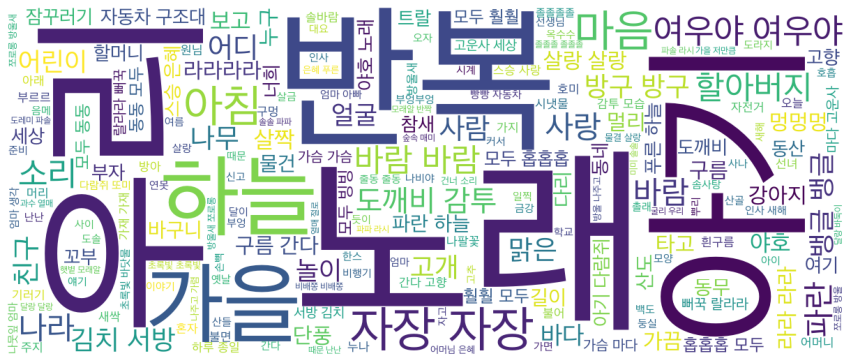

In [26]:
word_cloud(df, "동요")

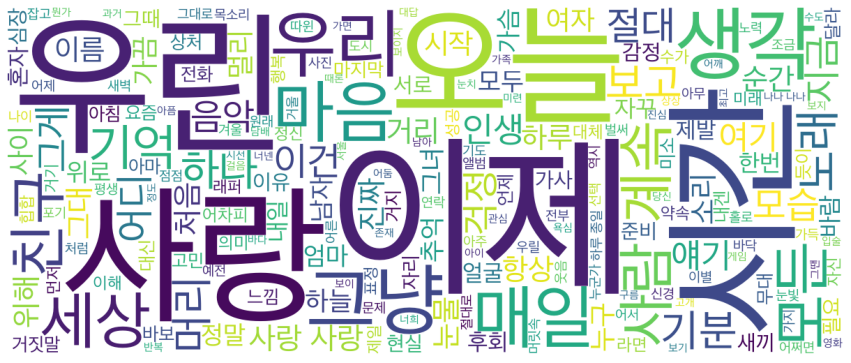

In [27]:
word_cloud(df, "힙합")

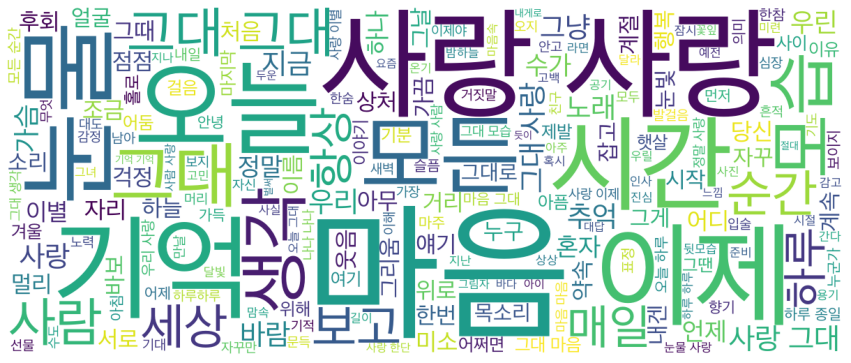

In [28]:
word_cloud(df, "발라드")